# Project 3: Web APIs and NLP <br>

#### Brandie Hatch

### Modeling

## Imports, Data Reading, and Model Prep

In [2]:
# python library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV, RidgeCV, Ridge, Lasso, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, learning_curve, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer, TransformedTargetRegressor
from sklearn.svm import LinearSVC, SVC 
from sklearn.feature_extraction.text import CountVectorizer


%matplotlib inline
pd.options.display.max_columns =999

import requests
import time
import re
import nltk

c:\Users\hatch\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [3]:
# Read in Data

df = pd.read_csv('./data/prepped.csv', index_col=False)
print(df.shape)
df.head()

(9150, 11)


,subreddit,title,selftext,ups,score,num_comments,subreddit_num,title_length,title_word_count,selftext_length,selftext_word_count
0,Dogtraining,Trick of the Month - May 2022 - Crawl Backwards,Welcome to the Trick of the Month!\n\nThis mon...,8,8,4,1,47,10,856,140
1,Dogtraining,How do I get a cafe/brewery dog?,I am sitting at a brewery right now and all th...,311,311,88,1,32,7,337,67
2,Dogtraining,Warning: Gross,I noticed my dog trying to eat the poop of oth...,19,19,40,1,14,2,249,49
3,Dogtraining,My 3 months samoyed forgot all his training af...,"As the title says, after having stomach issues...",28,28,18,1,71,14,680,138
4,Dogtraining,Two mat questions!,Hi! I have a dog bed in the living room and I’...,6,6,0,1,18,3,797,157


In [4]:
df['text'] = df['title'] + " " + df['selftext']

In [5]:
cvex = CountVectorizer(lowercase=True, stop_words={'english'})

In [6]:
c_text = cvex.fit_transform(df['text'])
c_text
c_text = pd.DataFrame(c_text.todense(), columns=cvex.get_feature_names_out())
c_text

,05,06,10,12,13,135,15,17kg,18,19lb,20,2022,20ft,22,22lbs,24,25,2yo,30,45,50lb,55lbs,9wks,able,about,above,absolutely,abused,accidentally,accidents,acclimating,accompanied,accounts,acre,act,acting,active,actively,activities,activity,acts,actual,actually,added,additional,adjusting,adopted,adopting,adorable,advance,advanced,advantage,advice,advised,affectionate,afford,after,again,age,ages,aggression,aggressive,aggressively,agility,ago,ahold,aid,alert,all,allergies,allowed,almost,alone,along,already,also,always,am,amazing,amount,amounts,amp,an,anal,and,angel,angry,animal,animals,another,answer,anxiety,anxious,any,anybody,anyone,anything,apart,apologies,appears,appointment,appreciated,approaches,are,area,aren,around,arthritis,as,asking,aspect,associated,association,assuming,at,attack,attacked,attacking,attacks,attempt,attention,average,avoid,away,baby,back,backstory,backwards,backyard,bad,bags,ball,bark,barking,barks,based,basic,basically,bath,bathroom,bc,be,beach,beagle,beautifully,became,because,become,bed,bedroom,been,before,beginning,behavior,behaviors,behaviour,being,belgium,believe,bell,bernard,best,better,between,big,biking,bit,bite,bites,biting,bitten,bitting,bizarre,black,blanket,blood,bones,boot,booties,boss,both,bowel,bowl,boxer,boyfriend,brace,brag,brain,brainstorming,breed,breeds,breweries,brewery,bringing,broken,brown,bug,building,built,bunny,busy,but,butt,buy,buying,by,cafe,cafes,call,calls,calm,calmness,calms,came,camp,camping,campsite,can,canada,cannto,car,care,caring,carry,case,cat,catahoula,cats,cause,causing,ceiling,celsius,cementing,center,certain,challenges,change,changing,chases,cheaper,check,checkup,checkups,chew,chewer,chewing,chewy,chiahuahuas,chihuahua,city,classes,clean,clear,click,clinic,close,closely,closing,clump,coat,cockierspaniel,cold,collar,college,color,com,combine,come,comes,comfort,comfortable,coming,command,commands,comment,comments,communities,complaint,completely,concept,concern,concerned,concerning,confirm,confuse,confused,considering,consistency,consistently,console,constant,constantly,contact,continue,continues,corgi,corner,correct,corrections,costs,couch,could,couple,course,covid,crate,crated,crawl,crazy,create,creating,cries,cruel,crusted,cry,cuddle,cuddling,cumbersome,currently,curtains,cut,daily,damage,dane,dark,dasuquin,day,daycare,daycares,days,deal,dealt,december,decide,decided,decides,deer,deficient,definitely,deliveries,describe,described,desperate,desperately,deterrent,did,didn,diet,difficulty,direction,directly,dirt,discharge,disservice,distance,distract,dives,do,doberman,docile,does,doesn,dog,doggy,dogs,doing,don,done,dont,door,down,downstairs,dr,driving,due,duration,during,duty,dysplasia,each,eachother,early,easily,eat,eaten,eating,eats,edit,efficiently,either,else,embarrassed,emphasize,end,ends,energy,enforce,enforced,engage,enjoy,enjoying,enough,enrichment,environment,equation,escape,especially,essentially,establishing,estimated,etc,even,evening,event,events,eventually,ever,every,everyone,everything,everywhere,exact,except,excitable,excited,excitement,exercise,exercising,exit,expect,experience,experienced,extensive,extra,eye,eyes,facing,fact,factors,fades,fail,fairly,family,faq,far,faster,favourite,fear,featured,feedback,feeder,feel,feeling,female,fence,fetch,few,figure,film,find,finding,finds,fine,first,fit,five,fix,fixated,flea,flex,floor,fluid,foaming,focus,focused,food,footballs,for,forgive,forgot,form,found,frankly,free,freeze,friend,friendly,friends,from,front,frozen,full,fully,fun,fur,future,galley,garden,gardens,...,punishment,pup,puppy,purchased,push,pushes,pushing,putting,puzzle,quality,question,questions,quick,quickly,quiet,quirky,quite,rain,raised,rally,ran,randomly,rarely,rate,rather,re,react,reaction,reactive,read,realistically,really,rear,reason,recall,receding,recently,recommendation,recommendations,redirect,refill,refusing,regard,regular,rehomed,rehoming,reinforcement,related,relationship,relax,relaxation,relaxing,relevant,relieve,remains,repeatedly,repell

In [7]:
df = pd.concat([c_text, df], axis=1)

In [8]:
# imported data split between two subreddits
df['subreddit_num'].value_counts(normalize=True)

1    0.502732
0    0.497268
Name: subreddit_num, dtype: float64

In [9]:
# Create X and y using StandardScaler to scale values
X = df.drop(columns=['subreddit_num', 'subreddit', 'text', 'title', 'selftext'])
#X = df[['ups', 'score', 'num_comments', 'title_length', 'title_word_count', 'text']]
y = df['subreddit_num']

In [10]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [11]:
# calculate the baseline accuracy (% of the majority class, dogtraining)
# benchmark to beat is .502732
y.value_counts(normalize=True)

1    0.502732
0    0.497268
Name: subreddit_num, dtype: float64

## Modeling

### Random Forest Classifier

In [12]:
# column transformer, countvectorizer needs to only go to the text columns
#col_trans = ColumnTransformer([
    #('cvex', CountVectorizer(lowercase=True, stop_words={'english'}), 'text')
 #   ('ss', StandardScaler(), ['ups', 'score', 'num_comments', 'title_length', 'title_word_count', 'selftext_length', 'selftext_word_count'])],
  #  remainder='passthrough',
   # sparse_threshold=0
#)

In [13]:
#col_trans.fit_transform(X_train)

In [14]:
# pipeline StandardScaler + instantiate RandomForestClassifier
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('rf', RandomForestClassifier())
])

In [15]:
params = {
    'rf__n_estimators': [1, 100, 200],
    'rf__max_depth': [None, 1, 2, 3, 4, 5]
}
gs = GridSearchCV(pipe, param_grid=params, cv=5)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

1.0


{'rf__max_depth': None, 'rf__n_estimators': 1}

In [16]:
params = {
    'rf__n_estimators': [1, 100, 200],
    'rf__max_depth': [None, 1, 2, 3, 4, 5]
}
rsv = RandomizedSearchCV(pipe, param_distributions=params, cv=5)
rsv.fit(X_train, y_train)
print(rsv.best_score_)
rsv.best_params_

1.0


{'rf__n_estimators': 100, 'rf__max_depth': 4}

In [17]:
print(y_train.mean(), y_test.mean())

0.5027322404371585 0.5027322404371585


In [18]:
#pd.DataFrame(gs.cv_results_).sort_values(by='mean_test_score', ascending=False)

In [19]:
gs.score(X_train, y_train)

1.0

In [20]:
gs.score(X_test, y_test)

1.0

### Decision Tree Classifier

I was curious about the differences.

In [32]:
null_model = DummyRegressor()
null_model.fit(X_train, y_train)

mean_squared_error(y_train, null_model.predict(X_train))

0.2499925348621935

In [33]:
pipe2 = Pipeline([
    ('ss', StandardScaler(), df),
    ('tree', DecisionTreeClassifier(random_state=1, max_depth=3),, )
])

In [34]:
tree.fit(pipe2, X_train, y_train)

tree.score(pipe2, X_train, y_train), tree.score(X_test, y_test)

NameError: name 'tree' is not defined

In [49]:
pd.Series(tree.predict(X_test)).value_counts()

0    1420
1    1325
dtype: int64

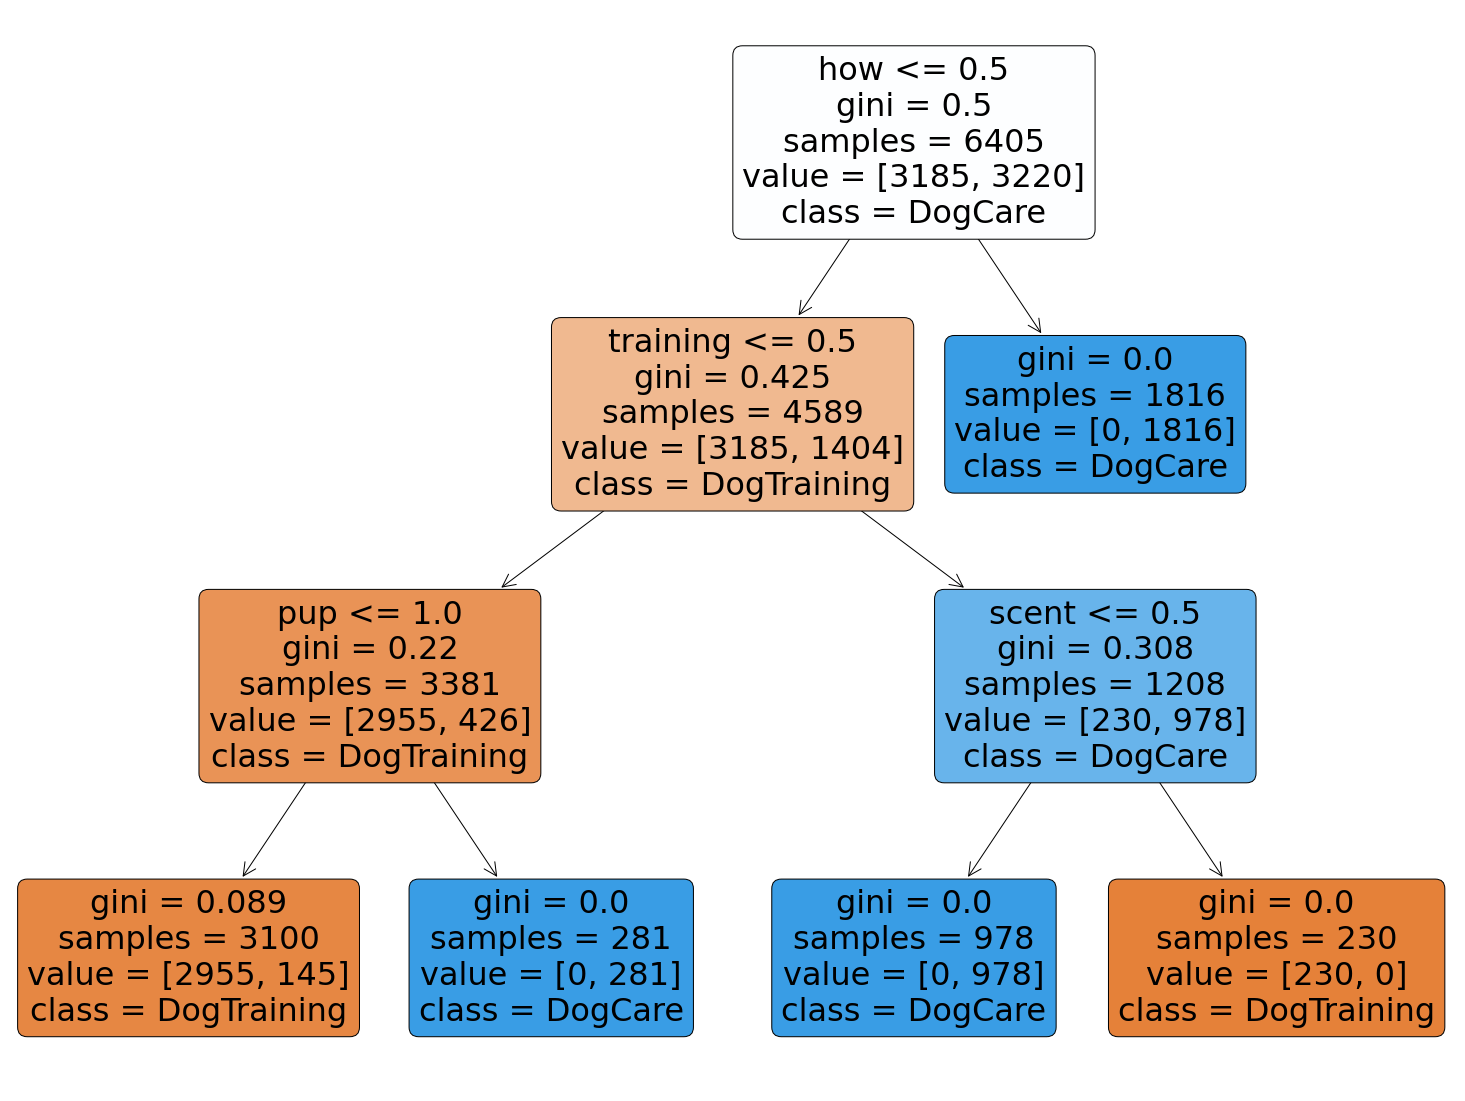

In [50]:
plt.figure(figsize=(26, 20))

plot_tree(
    tree, 
    filled=True, 
    feature_names=X.columns, 
    class_names=['DogTraining', 'DogCare'], 
    rounded=True
);

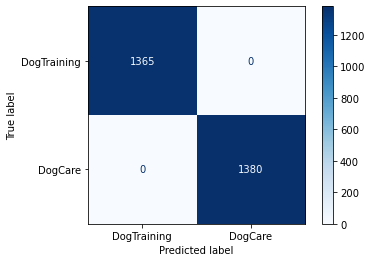

In [76]:
ConfusionMatrixDisplay.from_estimator(
    gs, 
    X_test, 
    y_test, 
    display_labels=['DogTraining', 'DogCare'], 
    cmap='Blues'
);

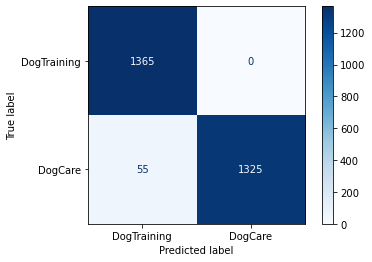

In [56]:
ConfusionMatrixDisplay.from_estimator(
    tree, 
    X_test, 
    y_test, 
    display_labels=['DogTraining', 'DogCare'], 
    cmap='Blues'
);

In [63]:
print(f'Accuracy Score Grid Search: {accuracy_score(y_test, gs.predict(X_test))}')
print(f'Accuracy Score Random Search: {accuracy_score(y_test, rsv.predict(X_test))}')
print(f'Accuracy Score Tree: {accuracy_score(y_test, tree.predict(X_test))}') 

Accuracy Score Random Search: 1.0
Accuracy Score Tree: 0.9799635701275046


In [53]:
y_test.sum()/y_test.count()

0.5027322404371585

In [64]:
print(f'ROC Auc Grid Search: {roc_auc_score(y_test, gs.predict(X_test))}')
print(f'ROC Auc Random Search: {roc_auc_score(y_test, rsv.predict(X_test))}')
print(f'ROC Auc Score Tree: {roc_auc_score(y_test, tree.predict(X_test))}')

ROC Auc Random Search: 1.0
ROC Auc Score Tree: 0.980072463768116


In [66]:
print(f'Precision Score GridSearch: {precision_score(y_test, gs.predict(X_test))}')
print(f'Precision Score Random Search: {precision_score(y_test, rsv.predict(X_test))}')
print(f'Precision Score Tree: {precision_score(y_test, tree.predict(X_test))}')

Precision Score Random Search: 1.0
Precision Score Tree: 1.0


In [67]:
print(f'Recall Score Grid Search: {recall_score(y_test, gs.predict(X_test))}')
print(f'Recall Score Random Search: {recall_score(y_test, rsv.predict(X_test))}')
print(f'Recall Score Tree: {recall_score(y_test, tree.predict(X_test))}')

Recall Score Random Search: 1.0
Recall Score Tree: 0.9601449275362319


In [73]:
# specificity
print(f'Specificity Grid Search: {recall_score(y_test, gs.predict(X_test), pos_label=0)}')
print(f'Specificity Random Search: {recall_score(y_test, rsv.predict(X_test), pos_label=0)}')
print(f'Specificity Tree: {recall_score(y_test, tree.predict(X_test), pos_label=0)}')

Specificity Random Search: 1.0
Specificity Tree: 1.0


In [74]:
print(f'F1 Score Grid Search: {f1_score(y_test, gs.predict(X_test))}')
print(f'F1 Score Random Search: {f1_score(y_test, rsv.predict(X_test))}')
print(f'F1 Score Tree: {f1_score(y_test, tree.predict(X_test))}')

F1 Score Random Search: 1.0
F1 Score Tree: 0.9796672828096119


In [75]:
y_test.value_counts(normalize=True)

1    0.502732
0    0.497268
Name: subreddit_num, dtype: float64

### Support Vector Machines (SVM): Linear SVC & C-Support Vector Classification

In [80]:
# define linspace variable
pgrid = {
    'C': np.linspace(0.0001, 1, 20)
}

In [83]:
# instantiate and fit gridsearch
gs_svm = GridSearchCV(LinearSVC(max_iter=100000), pgrid)

gs_svm.fit(X, y)

c:\Users\hatch\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [145]:
print(gs_svm.best_score_)
print(gs_svm.best_params_)

0.7707103825136612
{'C': 0.21060526315789474}


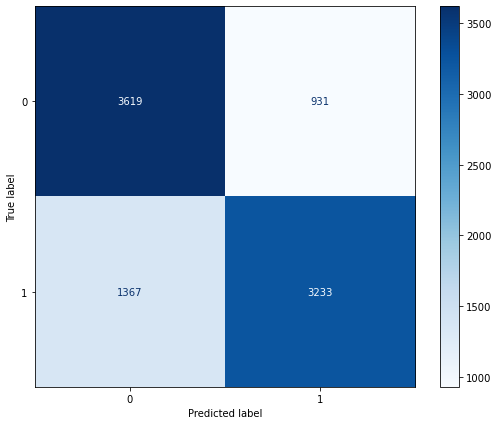

In [146]:
fig, ax = plt.subplots(figsize=(9, 7))
ConfusionMatrixDisplay.from_estimator(gs_svm, X_ss, y, cmap='Blues', ax=ax);

In [147]:
(3619+1)/(3619+1+1367+3)

0.7254509018036072

In [165]:
y_test

6233    0
609     1
9019    0
3354    1
4256    1
       ..
4001    1
1354    1
1461    1
5088    0
6651    0
Name: subreddit_num, Length: 2745, dtype: int64

In [169]:
svc = SVC()
pgrid = {
    'C': np.logspace(-3, 10, 20),
    'kernel': ['poly'],
    'degree': [2],
    'gamma': np.logspace(-1, 3, 13) 
}
gs_svc = GridSearchCV(svc, pgrid)
# Fit on training data.
gs_svc.fit(X_train, y_train)
# Evaluate model.
gs_svc.score(X_test, y_test)

KeyboardInterrupt: 

In [159]:
gs_svc.best_params_

{'C': 0.004832930238571752, 'gamma': 10.0, 'kernel': 'rbf'}

In [161]:
# Create DataFrame with column for predicted values.
results = pd.DataFrame(gs_svc.predict(X_test), columns=['predicted'])
# Create column for observed values.
results['actual'] = y_test
results.head()

,predicted,actual
0,0,NaN
1,1,NaN
2,0,NaN
3,1,NaN
4,1,NaN


## Model Evaluation & Comparison

## Answer Problem, Conclusions, and Recommendations

## Sources